In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Ali\Desktop\Data Analysis Projects\turing\covid_data.csv")

In [3]:
df.head(10)

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5
5,Afghanistan,2020-01-05,0,0,38928341.0,2.581,1803.987,0.5
6,Afghanistan,2020-01-06,0,0,38928341.0,2.581,1803.987,0.5
7,Afghanistan,2020-01-07,0,0,38928341.0,2.581,1803.987,0.5
8,Afghanistan,2020-01-08,0,0,38928341.0,2.581,1803.987,0.5
9,Afghanistan,2020-01-09,0,0,38928341.0,2.581,1803.987,0.5


In [4]:
df.shape

(23082, 8)

In [5]:
df.columns

Index(['location', 'date', 'new_cases', 'new_deaths', 'population',
       'aged_65_older_percent', 'gdp_per_capita',
       'hospital_beds_per_thousand'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23082 entries, 0 to 23081
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    23082 non-null  object 
 1   date                        23082 non-null  object 
 2   new_cases                   23082 non-null  int64  
 3   new_deaths                  23082 non-null  int64  
 4   population                  23018 non-null  float64
 5   aged_65_older_percent       20643 non-null  float64
 6   gdp_per_capita              20711 non-null  float64
 7   hospital_beds_per_thousand  19144 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 1.4+ MB


In [7]:
df.describe

<bound method NDFrame.describe of             location        date  new_cases  new_deaths  population  \
0        Afghanistan  2019-12-31          0           0  38928341.0   
1        Afghanistan  2020-01-01          0           0  38928341.0   
2        Afghanistan  2020-01-02          0           0  38928341.0   
3        Afghanistan  2020-01-03          0           0  38928341.0   
4        Afghanistan  2020-01-04          0           0  38928341.0   
...              ...         ...        ...         ...         ...   
23077  International  2020-02-28          0           0         NaN   
23078  International  2020-02-29          0           2         NaN   
23079  International  2020-03-01          0           0         NaN   
23080  International  2020-03-02          0           0         NaN   
23081  International  2020-03-10         -9           1         NaN   

       aged_65_older_percent  gdp_per_capita  hospital_beds_per_thousand  
0                      2.581        18

In [8]:
df.dtypes

location                       object
date                           object
new_cases                       int64
new_deaths                      int64
population                    float64
aged_65_older_percent         float64
gdp_per_capita                float64
hospital_beds_per_thousand    float64
dtype: object

In [9]:
df.isnull().sum()

location                         0
date                             0
new_cases                        0
new_deaths                       0
population                      64
aged_65_older_percent         2439
gdp_per_capita                2371
hospital_beds_per_thousand    3938
dtype: int64

In [10]:
df['gdp_per_capita'].mean() # Average GDP per capita

22708.38479088407

In [11]:
df.sort_values('hospital_beds_per_thousand', ascending=False).iloc[0]['location'] # Country with max hospital beds per thousand

'Monaco'

In [12]:
df['new_cases'].sum() # Total worldwide cases 

14420924

In [13]:
df['new_deaths'].sum() # Total worldwide deaths

822390

Text(0.5, 0, 'Date')

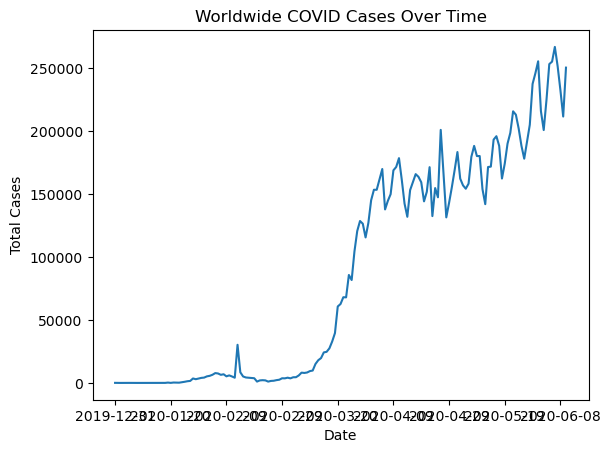

In [14]:
df.groupby('date')['new_cases'].sum().plot()
plt.title("Worldwide COVID Cases Over Time")
plt.ylabel("Total Cases")
plt.xlabel("Date")

<Axes: xlabel='location'>

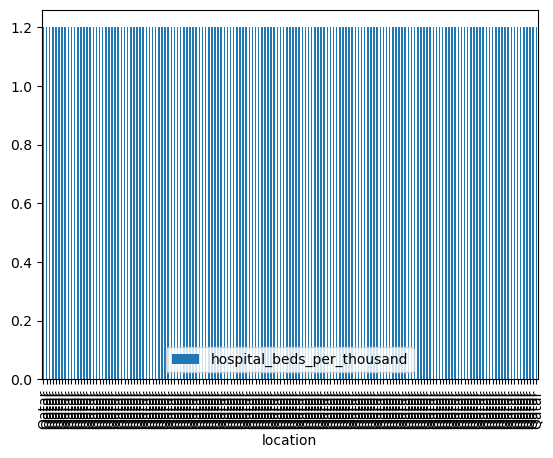

In [15]:
# Hospital beds bar chart for top GDP countries
top_gdp = df.sort_values('gdp_per_capita', ascending=False)['location'][:5] 
df[df['location'].isin(top_gdp)].plot.bar(x='location', y='hospital_beds_per_thousand')

Text(0, 0.5, 'COVID Deaths')

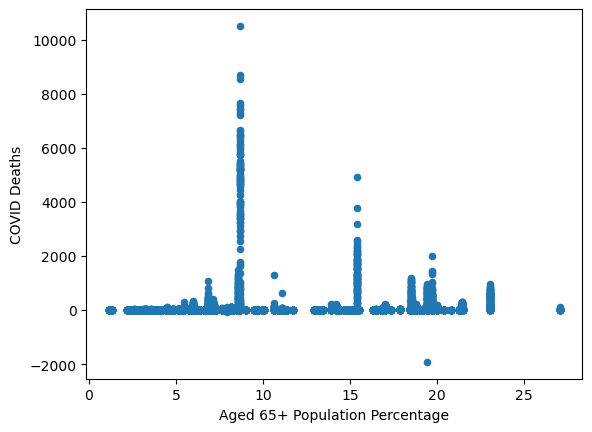

In [16]:
# Scatter plot of aged 65+ vs death rate 
df.plot.scatter(x='aged_65_older_percent', y='new_deaths') 
plt.xlabel("Aged 65+ Population Percentage")  
plt.ylabel("COVID Deaths")

In [17]:
df_italy = df[df['location'] == 'Italy']
df_germany = df[df['location'] == 'Germany']

# Merge the Italy and Germany data on the 'date' column
merged_df = pd.merge(df_italy[['date', 'new_cases']], df_germany[['date', 'new_cases']], on='date', suffixes=('_Italy', '_Germany'))

# Calculate the cumulative difference in cases
merged_df['cases_difference'] = merged_df['new_cases_Italy'].cumsum() - merged_df['new_cases_Germany'].cumsum()

# Find the date when the difference is more than 10,000
date_threshold = merged_df.loc[merged_df['cases_difference'] > 10000, 'date'].min()

print("The date when the difference first became more than 10,000 is:", date_threshold)

The date when the difference first became more than 10,000 is: 2020-03-12


In [18]:
from scipy.optimize import curve_fit

italy_data = df[(df['location'] == 'Italy') & (df['date'] >= '2020-02-28') & (df['date'] <= '2020-03-20')]

# Extracting days and cumulative cases
days = np.arange(1, len(italy_data) + 1)
cumulative_cases = italy_data['new_cases'].cumsum()

# Define the exponential function
def exponential_function(x, A, B):
    return A * np.exp(B * x)

# Fit the exponential function to the data
params, covariance = curve_fit(exponential_function, days, cumulative_cases)

# Evaluate the fitted function on 2020-03-20
days_since_start = (pd.to_datetime('2020-03-20') - pd.to_datetime('2020-02-28')).days
predicted_cases_on_2020_03_20 = exponential_function(days_since_start, *params)

# Actual number of cases on 2020-03-20
actual_cases_on_2020_03_20 = italy_data[italy_data['date'] == '2020-03-20']['new_cases'].cumsum().values[0]

# Calculate the difference
difference = int(predicted_cases_on_2020_03_20 - actual_cases_on_2020_03_20)

print("The difference between the exponential curve and the total number of real cases on 2020-03-20 is:", difference)

The difference between the exponential curve and the total number of real cases on 2020-03-20 is: 30766


In [19]:
df['death_rate'] = (df['new_deaths'].cumsum() / df['population']) * 1e6

# Select data for the specified countries
selected_countries = ['USA', 'Belgium', 'Italy', 'Andorra', 'Spain']
country_death_rates = {}

for country in selected_countries:
    country_data = df[df['location'] == country]
    total_deaths_per_million = country_data['death_rate'].max()  # Considering the latest date
    country_death_rates[country] = total_deaths_per_million

# Sort the countries by death rate and find the 3rd highest
sorted_countries = sorted(country_death_rates.items(), key=lambda x: x[1], reverse=True)
third_highest_country = sorted_countries[2][0]

print("The country with the 3rd highest death rate is:", third_highest_country)

The country with the 3rd highest death rate is: Spain


In [21]:
from sklearn.metrics import f1_score

conditions = (df['aged_65_older_percent'] > 20) & (df['death_rate'] > 50)

# Apply conditions to get predicted outcomes
predicted_outcomes = conditions.astype(int)

# If you want to evaluate the F1 score without actual outcomes, create a dummy column
df['actual_outcomes'] = 0  # Assuming 0 for all rows

# Calculate F1 score
f1 = f1_score(df['actual_outcomes'], predicted_outcomes)

print("The F1 score is:", f1)

The F1 score is: 0.0


In [22]:
conditions = (df['hospital_beds_per_thousand'] >= 5) & (df['gdp_per_capita'] > 10000)

# Calculate the probability
probability = (conditions.sum() / df[df['hospital_beds_per_thousand'] >= 5].shape[0]) * 100

print("The probability is:", probability, "%")

The probability is: 85.65304372677907 %
